In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings( 'ignore' )

pd.options.display.max_columns = None
pd.options.display.max_rows = None

species_ordered_color = {'Chimpanzee': "red",
'Rhesus': "blue",
'Human': "green",
'Marmoset': "orange"
 }

PYTHON_PATH = "/Users/rb4174/Documents/projects/brain_dev_primates/altricial_brain_vocal_learning"


# Opening and preparing datasets

In [2]:
df = pd.read_excel("{0}/data/brain_growth_complete.xlsx".format(PYTHON_PATH),index_col=False)
print(len(df))
df.head()

df.loc[len(df.index) + 1] = [0,0,'Human',"Contour condition",0,0,0]
df.loc[len(df.index) + 1] = [0,0,'Chimpanzee',"Contour condition",0,0,0] 
df.loc[len(df.index) + 1] = [0,0,'Rhesus',"Contour condition",0,0,0] 
df.loc[len(df.index) + 1] = [0,0,'Marmoset',"Contour condition",0,0,0]

df = df[df.Species != "Capuchin"]

531


# Create events dicts

In [3]:
df_events = pd.read_excel("{0}/data/developmental_stages_events.xlsx".format(PYTHON_PATH))
df_events = df_events.dropna()
print(df_events["event"].unique())
df_events.head()

['dental_early_infancy_ends' 'dental_late_infancy_ends' 'gestation'
 'sexual_maturation_juvenile_end' 'weaning_complete']


,event_type,event,specie,min_wkspc,max_wkspc,avg_wkspc,avg_month_pc,sd_(days),original_format,original_description,data_reference
0,developmental_stages,dental_early_infancy_ends,Chimpanzee,84.142857,84.142857,84.142857,21.035714,0.0,"53.8 weeks, 12 months",ealy infancy = deciduous teeth last eruption,"Smith 2005, https://www.sciencedirect.com/scie..."
1,developmental_stages,dental_early_infancy_ends,Human,141.771429,141.771429,141.771429,35.442857,0.0,"108 weeks, 24 months",ealy infancy = deciduous teeth last eruption,"Smith 2005, https://www.sciencedirect.com/scie..."
2,developmental_stages,dental_early_infancy_ends,Marmoset,25.714286,25.714286,25.714286,6.428571,0.0,5 weeks,ealy infancy = deciduous teeth last eruption,"Smith 2005, https://www.sciencedirect.com/scie..."
3,developmental_stages,dental_early_infancy_ends,Rhesus,46.334914,46.334914,46.334914,11.583729,0.0,0.437 year,ealy infancy = deciduous teeth last eruption,"Smith 1994, Ages of Eruption of Primate Teeth:..."
4,developmental_stages,dental_early_infancy_ends,Capuchin,42.707371,42.707371,42.707371,10.676843,0.0,0.393 year,ealy infancy = deciduous teeth last eruption,"Smith 1994, Ages of Eruption of Primate Teeth:..."


In [4]:
gestation_periods,gestation_periods_sd,late_infancy_ends,early_infancy_ends,juvenile_ends = {},{},{},{},{}

for specie in df_events["specie"].unique():
    df_events_specie = df_events[(df_events.specie == specie)]
    gestation_periods[specie] = df_events_specie[(df_events_specie.event == "gestation")]["avg_wkspc"].values[0]
    gestation_periods_sd[specie] = df_events_specie[(df_events_specie.event == "gestation")]["sd_(days)"].values[0]/7
    early_infancy_ends[specie] = df_events_specie[(df_events_specie.event == "dental_early_infancy_ends")]["avg_wkspc"].values[0]
    late_infancy_ends[specie] = df_events_specie[(df_events_specie.event == "dental_late_infancy_ends")]["avg_wkspc"].values[0]
    juvenile_ends[specie] = df_events_specie[(df_events_specie.event == "sexual_maturation_juvenile_end")]["avg_wkspc"].values[0]

    
cut_period = {'Chimpanzee': 200, #'late_infancy': 187.34285714285713,
 'Human': 380, #'late_infancy': 348.1714285714285,
 'Marmoset': 60, #'late_infancy': 36.19428571428571
 'Rhesus': 100, #'late_infancy': 93.4457142857143
 }

# Brain growth Fits

## original days

Chimpanzee
Rhesus
Human
Marmoset


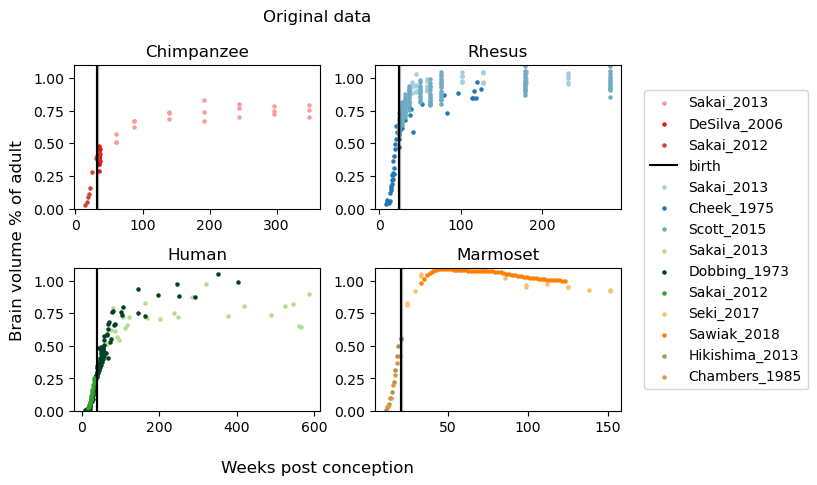

In [6]:
custom_colour_pal = ['#fb9a99','#e31a1c',"#C64739",'#a6cee3','#1f78b4','#6FACC4','#b2df8a',"#004225",'#33a02c','#fdbf6f','#ff7f00','#B29150',"#EA923F"]
FIT_VARIABLE = "weeks_post_conception" 

i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=2)

for row in ax:
    for col in row:
        try:
            specie = list(species_ordered_color.keys())[i]
            print(specie)
            df_species = df[(df.Species == specie)]
            for data_origin in df_species["data_origin"].unique():
                if data_origin != "Contour condition":
                    df_species_data = df_species[df_species.data_origin == data_origin]
                    col.scatter(df_species_data[FIT_VARIABLE],df_species_data["Adult_percent_brain_volume_cm3"],
                                color = custom_colour_pal[j],
                                label = data_origin if data_origin != "Contour condition" else "", marker = 'o', s =5)
                    j+= 1
            col.axvline(x = gestation_periods[specie], color = "black",linestyle = '-',label="birth" if i == 0 else "")
            col.axvspan(gestation_periods[specie] - gestation_periods_sd[specie], gestation_periods[specie] + gestation_periods_sd[specie], alpha=0.2, color='black')

            col.set_title(specie)
            col.set_ylim(0,1.1)

            i += 1
        except:
            pass

fig.supxlabel('Weeks post conception') 
fig.supylabel('Brain volume % of adult')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Original data")
fig.savefig("{0}/figs/2A.pdf".format(PYTHON_PATH),dpi = 800)
plt.tight_layout()
plt.show()